In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
from tensorflow.keras.regularizers import l1, l2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PotatoDataset",
    image_size=(256, 256),
    shuffle=True,
    verbose=True
)

Found 2152 files belonging to 3 classes.


In [9]:
dataset.class_names
classes = ["Potato___Early_blight", "Potato___Late_blight", "Potato___healthy"]

Resize images

In [10]:
# Function to normalize images
def normalize_image(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Divide by 255 to normalize
    return image, label

dataset = dataset.map(normalize_image)

Image batch shape: (32, 256, 256, 3)
Label batch shape: (32,)
value-- tf.Tensor([1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 2 1 0 1 1 1 0 2 0 0 1 0], shape=(32,), dtype=int32)


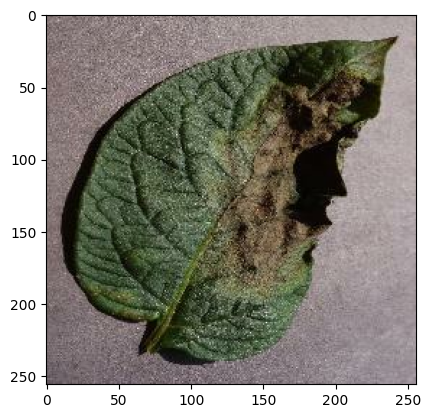

In [11]:
for img,j in dataset.take(1):
    print("Image batch shape:", img.shape)  # Should be (batch_size, height, width, channels)
    print("Label batch shape:", j.shape)
    print("value--", j)
    for k in range(1):
        plt.imshow(img[k].numpy())
    

Split dataset

In [7]:
len(dataset)

68

In [12]:
train_data = dataset.take(int(len(dataset)*0.8))
print("Lenght of train dataset is-",len(train_data))

Lenght of train dataset is- 54


In [13]:
remaining_data = dataset.skip(int(len(dataset)*0.8))

test_data = remaining_data.take(int(len(remaining_data)*0.5))
validation_data = remaining_data.skip(int(len(remaining_data)*0.5))

print("Lenght of test dataset is-",len(test_data))
print("Lenght of validation dataset is-",len(validation_data))

Lenght of test dataset is- 7
Lenght of validation dataset is- 7


In [27]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    # Dense(
    #     5, input_dim=5,
    #     kernel_initializer='ones',
    #     kernel_regularizer=L1(0.01),
    #     activity_regularizer=L2(0.01)
    #     ),
    Dense(3, kernel_regularizer='l1'),

    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │       738,051 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 758,342 (2.89 MB)

 Trainable params: 758,342 (2.89 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [30]:
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=10
)


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 175s 3s/step - accuracy: 0.4022 - loss: 6.5280 - val_accuracy: 0.4900 - val_loss: 2.0833
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.4682 - loss: 1.9269 - val_accuracy: 0.5050 - val_loss: 1.9283
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step - accuracy: 0.5289 - loss: 1.8627 - val_accuracy: 0.4250 - val_loss: 1.7798
Epoch 4/10
53/54 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5267 - loss: 1.7974

KeyboardInterrupt: 

Vizualizing my model

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [15]:
model.save("potato_disease_model.h5")  # Save the model in HDF5 format

## Load model

In [20]:
model = load_model("potato_disease_model.h5")

In [17]:
predictions = model.predict(test_data)

# Use tf.argmax to get the predicted class indices
predicted_classes = tf.argmax(predictions, axis=1).numpy()

# Extract true labels from the test dataset
true_labels = []
for _, labels in test_data:
    true_labels.extend(labels.numpy())

true_labels = tf.convert_to_tensor(true_labels)

# Print some predictions vs. true labels for verification
for i in range(10):  # Adjust the range as needed
    print(f"True label: {true_labels[i]}, Predicted: {predicted_classes[i]}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 615ms/step
True label: 1, Predicted: 0
True label: 0, Predicted: 0
True label: 1, Predicted: 1
True label: 0, Predicted: 1
True label: 1, Predicted: 0
True label: 0, Predicted: 2
True label: 1, Predicted: 0
True label: 1, Predicted: 0
True label: 0, Predicted: 2
True label: 1, Predicted: 1


In [19]:
test_data[0]

TypeError: '_TakeDataset' object is not subscriptable

first_class =  Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step
Predicted label =  0


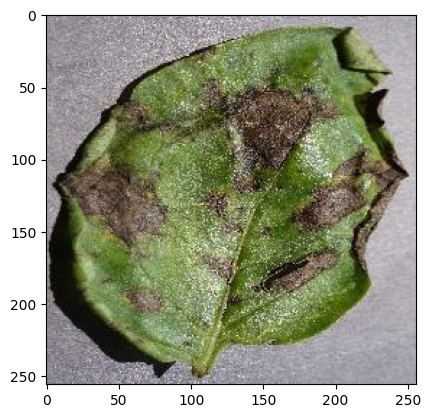

In [17]:
for img, label in test_data.take(1):
    first_image = img[0].numpy()
    first_class = label[0].numpy()

    plt.imshow(first_image)
    print("first_class = ", classes[first_class])

    predicted_img_cls = model.predict(img)
    print("Predicted label = ", np.argmax(predicted_img_cls))

In [4]:
print(len(test_data))

NameError: name 'test_data' is not defined

In [3]:
single_image = validation_data
single_image_batch = tf.expand_dims(single_image, axis=0)  # Shape: (1, 256, 256, 3)

predicted_label = model.predict(single_image_batch)
print("Predicted class:", np.argmax(predicted_label))


NameError: name 'validation_data' is not defined